In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time
import math


%matplotlib inline 
plt.set_cmap(cm.get_cmap("Spectral_r"))

<Figure size 432x288 with 0 Axes>

In [8]:
# initialize empty graph, colors indicate source and sink nodes, weights start at 0

DG = nx.DiGraph()

DG.add_node(1, pos=(0,0), color='green', name='source')
DG.add_node(2, pos=(0,1), color='grey', name='pass')
DG.add_node(3, pos=(1,0), color='grey', name='pass')
DG.add_node(4, pos=(1,1), color='grey', name='pass')
DG.add_node(5, pos=(2,0), color='grey', name='pass')
DG.add_node(6, pos=(2,1), color='red', name='sink')

DG.add_weighted_edges_from([(1, 2, 10), 
                            (1, 3, 0),
                            (2, 4, 0),
                            (3, 4, 5),
                            (3, 5, 4),
                            (4, 6, 1),
                            (5, 6, 0)])

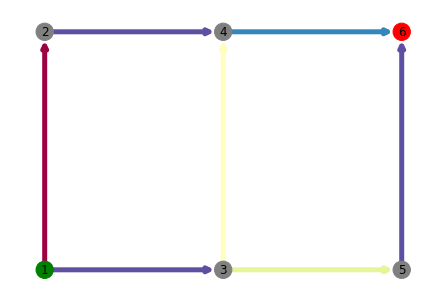

In [9]:
def show_graph(G):    
    colors = nx.get_edge_attributes(G,'weight').values()
    pos = nx.get_node_attributes(G,'pos')
    nodecol = nx.get_node_attributes(G, 'color').values()
    nx.draw(G, pos, 
            edge_color=colors,
            width=5.0,
            with_labels=True,
            node_color=nodecol)

show_graph(DG)

In [4]:
# add orientation properties

for (u,v) in DG.edges:
    x1 = DG.nodes[u]['pos'][0]
    y1 = DG.nodes[u]['pos'][1]
    
    x2 = DG.nodes[v]['pos'][0]
    y2 = DG.nodes[v]['pos'][1]
    
    if (x1 == x2):
        DG.edges[u,v]["orient"] = "vertical"
    else:
        DG.edges[u,v]["orient"] = "horizontal"
        
#nx.get_edge_attributes(DG,"orient")

In [5]:

seconds = time.time() % 60
switch = (math.floor(seconds/5) * 5) % 10

#set fixed variable for how many cars can exit an edge on the 10 second interval at each node, and how many are entering / exiting the system

flowrate = 10
inrate = 10
outrate = 10

#switch back and forth between accepting incoming vertical vs incoming horizontal
if (switch % 5 == 0):
    trafficdir = "horizontal"
else:
    trafficdir = "vertical"
    
print(trafficdir)
    
for node in DG.nodes:
    if DG.nodes[node]["name"] == "source":
        for u,v in DG.out_edges(node):
            if DG.edges[u,v]['orient'] == trafficdir:
                DG.edges[u,v]['weight'] = DG.edges[u,v]['weight'] + inrate
                print(DG.edges[u,v]['weight'] + inrate)
    #for green node, every 10 seconds, alternate adding cars to the outgoing weights
    elif DG.nodes[node]["name"] == "pass":
        passthrough = 0
        for u,v in DG.in_edges(node):
            edge = DG.edges[u,v]
            if edge['orient'] == trafficdir:
                passthrough = min(edge['weight'], flowrate)
                DG.edges[u,v]['weight'] = edge['weight'] - passthrough
        for u,v in DG.out_edges(node):
            edge = DG.edges[u,v]
            if edge['orient'] == trafficdir:
                DG.edges[u,v]['weight'] = edge['weight'] + passthrough
    #for red node, every 10 seconds, alternate removing cars from incoming weight
    elif DG.nodes[node]["name"] == "sink":
        for u,v in DG.in_edges(node):
            edge = DG.edges[u,v]
            if edge['orient'] == trafficdir:
                DG.edges[u,v]['weight'] = max(0, edge['weight'] - outrate)

horizontal
20


In [6]:
nx.get_edge_attributes(DG,'weight').values()

dict_values([0, 0, 0, 0, 0, 0, 0])

In [7]:
#DG.edges[1,2]['weight'] = 10